In [26]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import os

In [38]:
df = pd.read_csv("dataset/1024_Sha1.csv", index_col="timestamp")
df

,cpu_usage,memory_usage
timestamp,,
2024-04-06 09:49:31.171479,0.0,153.328125
2024-04-06 09:49:31.374006,0.7,153.390625
2024-04-06 09:49:31.579513,0.3,153.390625
2024-04-06 09:49:31.781685,0.1,153.390625
2024-04-06 09:49:31.984225,0.7,153.437500
...,...,...
2024-04-06 09:54:58.528606,1.0,269.000000
2024-04-06 09:54:58.731769,0.3,269.000000
2024-04-06 09:54:58.934615,0.2,269.000000


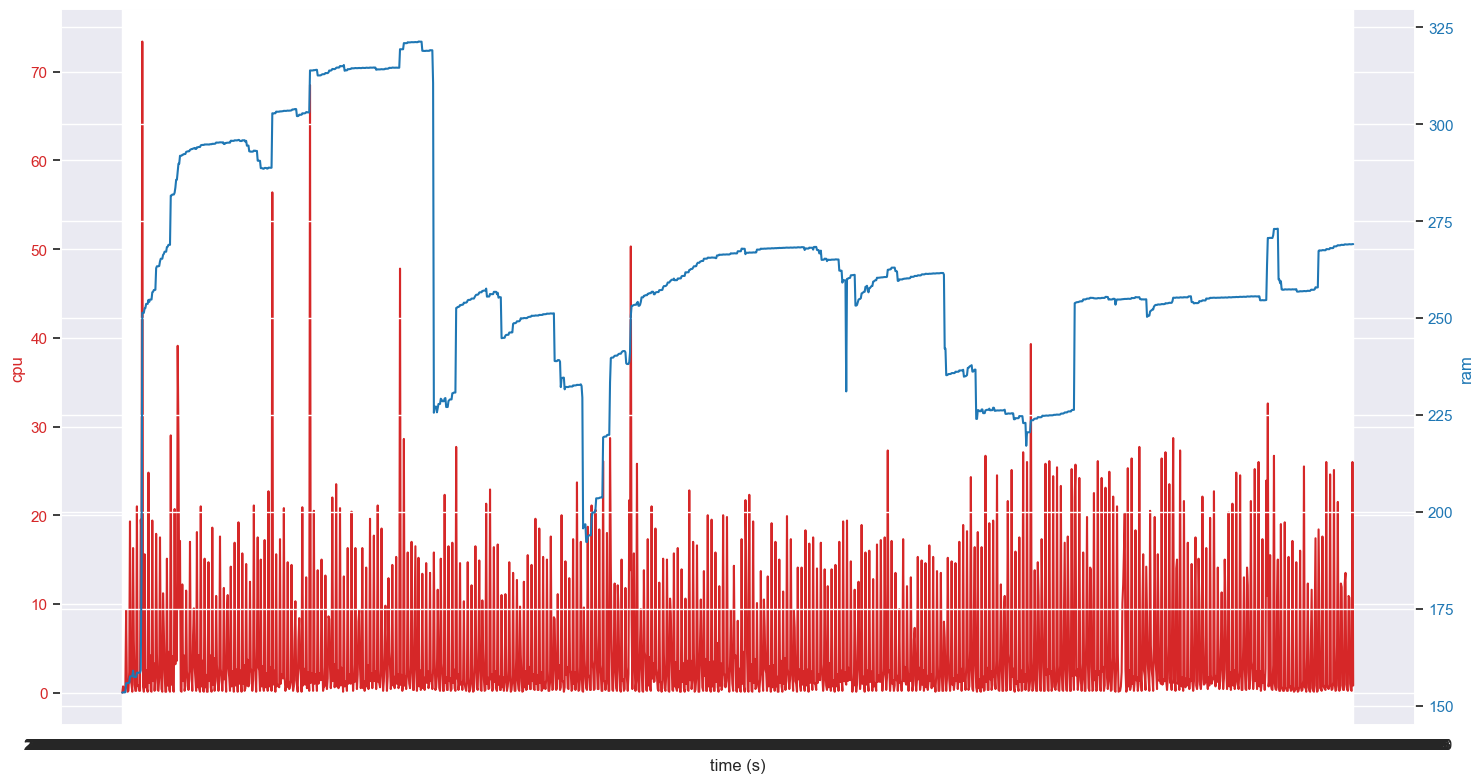

In [39]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('cpu', color=color)
ax1.plot(df.index, df['cpu_usage'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('ram', color=color)  # we already handled the x-label with ax1
ax2.plot(df.index, df['memory_usage'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [11]:
from datetime import datetime
import time
i = datetime.now().timestamp()
time.sleep(2)
e = datetime.now().timestamp() - i


In [12]:
c = 0
while True:
    

2.00529408454895

In [44]:
class A():
    def __init__(self, a, b) -> None:
        self.a = a 
        self.b = b 
        self.c = 5
    def print_f(self):
        print(f"{self.a, self.b, self.c}")
e = A(5, 6)
e.print_f()
e.c = 4
e.print_f()

(5, 6, 5)
(5, 6, 4)


In [3]:
def reorder_status(col):
    # Filtra los elementos que contienen la palabra "Status" y los ordena según el criterio especificado
    return sorted([x for x in col if "Status" in x], key=lambda x: x.lower(), reverse=True)

# Lista de entrada
col = ['Current', 'Runtime', 'Status_current', 'Status_runtime']

# Llamada a la función y resultado
result = reorder_status(col)
print(result)

['Status_runtime', 'Status_current']


In [9]:
import pandas as pd

# Ejemplo de creación de DataFrames con las columnas especificadas
df1 = pd.DataFrame(columns=['IOOutRuntimeCnt', 'Status_IOOutRuntimeCnt', 'MeasuredValue2IOValue', 'Status_MeasuredValue2IOValue'])
df2 = pd.DataFrame(columns=['CurrentValue', 'Status_CurrentValue', 'IOOutRuntimeCnt', 'Status_IOOutRuntimeCnt'])
df3 = pd.DataFrame(columns=['CurrentValue', 'Status_CurrentValue'])
# Función para reordenar las columnas de un DataFrame
def reorder_columns(df, first_cols):
    # Asegura que first_cols estén al inicio y el resto sigan el orden original
    if len(df.columns) == 4:
        cols = [col for col in df.columns if col not in first_cols] + first_cols
    else:
        cols = df.columns
    return df[cols]

# Columnas a colocar al principio
first_columns = ['IOOutRuntimeCnt', 'Status_IOOutRuntimeCnt']

# Reordenando las columnas de ambos DataFrames
df1_reordered = reorder_columns(df1, first_columns)
df2_reordered = reorder_columns(df2, first_columns)
df3_reordered = reorder_columns(df3, first_columns)
# Resultado
print("DataFrame 1 Reordered Columns:", df1_reordered.columns)
print("DataFrame 2 Reordered Columns:", df2_reordered.columns)
print("DataFrame 3 Reordered Columns:", df3_reordered.columns)


DataFrame 1 Reordered Columns: Index(['MeasuredValue2IOValue', 'Status_MeasuredValue2IOValue',
       'IOOutRuntimeCnt', 'Status_IOOutRuntimeCnt'],
      dtype='object')
DataFrame 2 Reordered Columns: Index(['CurrentValue', 'Status_CurrentValue', 'IOOutRuntimeCnt',
       'Status_IOOutRuntimeCnt'],
      dtype='object')
DataFrame 3 Reordered Columns: Index(['CurrentValue', 'Status_CurrentValue'], dtype='object')


In [50]:
import numpy as np

def generate_waveform(wave_type, amplitude, counter, past_value):
    """
    Update and return the waveform value based on the given parameters.
    
    Args:
    wave_type (str): Type of waveform ('Constant', 'Counter', 'Random', 'Sawtooth', 'Sinusoid', 'Square', 'Triangle').
    amplitude (tuple): Min and max amplitude as a tuple (min, max).
    counter (int): A counter value for generating certain types of waveforms.
    past_value (float): The last value generated by this function.

    Returns:
    tuple: A tuple containing the updated value and the new counter.
    """
    min_amp, max_amp = amplitude

    if wave_type == "Constant":
        current_value = max_amp
    elif wave_type == "Counter":
        current_value = (counter % (max_amp - min_amp)) + min_amp
        counter += 1
    elif wave_type == "Random":
        current_value = np.random.uniform(min_amp, max_amp)
    elif wave_type == "Sawtooth":
        current_value = (counter % (max_amp - min_amp)) + min_amp
        counter += 1
    elif wave_type == "Sinusoid":
        current_value = (np.sin(counter) * (max_amp - min_amp) / 2) + ((max_amp + min_amp) / 2)
        counter += 0.1
    elif wave_type == "Square":
        current_value = max_amp if counter % (2 * np.pi) < np.pi else min_amp
        counter += 0.1
    elif wave_type == "Triangle":
        current_value = (abs((counter % (4 * (max_amp - min_amp))) - 2 * (max_amp - min_amp)) - (max_amp - min_amp)) + min_amp
        counter += 1
    else:
        raise ValueError("Unsupported wave type")

    return current_value, counter

# Example Usage
counter = 0
past_value = 0
for _ in range(100):
    past_value, counter = generate_waveform("Sinusoid", (0, 10), counter, past_value)
    print(past_value)


5.0
5.49916708323414
5.993346653975306
6.477601033306698
6.947091711543253
7.397127693021015
7.823212366975177
8.221088436188456
8.586780454497614
8.916634548137417
9.207354924039482
9.456036800307176
9.660195429836131
9.817790927085966
9.927248649942301
9.987474933020273
9.997868015207526
9.958324052262343
9.869238154390974
9.73150043843707
9.546487134128407
9.316046833244368
9.04248201909795
8.728526060883599
8.377315902755752
7.992360720519779
7.5775068591073165
7.136899401169146
6.674940750779519
6.1962466460699055
5.70560004029933
5.2079033121664455
4.708129282862093
4.21127152928375
3.722294489865835
3.2460838615518925
2.7873977835257295
2.3508192954575255
1.9407105452863966
1.5611692040801235
1.215987523460353
0.9086144446779434
0.6421211379320564
0.41917031625272383
0.2419896305524194
0.11234941167451495
0.03154498183267762
0.0003837121794960652
0.019176955820795705
0.08773693687833628
0.20537862668430495
0.37092658836133463
0.5827267213992275
0.8386627888804865
1.1361775622200

In [3]:
a = [f"ns=2;i={i}" for i in range(1,10)]
a

['ns=2;i=1',
 'ns=2;i=2',
 'ns=2;i=3',
 'ns=2;i=4',
 'ns=2;i=5',
 'ns=2;i=6',
 'ns=2;i=7',
 'ns=2;i=8',
 'ns=2;i=9']

In [1]:
cert_base = ""
rsa_bits = [1024, 2048, 3072, 4096]
signature_algorithms = ["Sha1", "Sha224", "Sha256", "Sha384", "Sha512"]
list_certs = [f"{cert_base}/{x}_{y}/{x}_{y}_certificate.pem" for x in rsa_bits for y in signature_algorithms]
list_private_key = [f"{cert_base}/{x}_{y}/{x}_{y}_private_key.pem" for x in rsa_bits for y in signature_algorithms]
print(list_certs)

['/1024_Sha1/1024_Sha1_certificate.pem', '/1024_Sha224/1024_Sha224_certificate.pem', '/1024_Sha256/1024_Sha256_certificate.pem', '/1024_Sha384/1024_Sha384_certificate.pem', '/1024_Sha512/1024_Sha512_certificate.pem', '/2048_Sha1/2048_Sha1_certificate.pem', '/2048_Sha224/2048_Sha224_certificate.pem', '/2048_Sha256/2048_Sha256_certificate.pem', '/2048_Sha384/2048_Sha384_certificate.pem', '/2048_Sha512/2048_Sha512_certificate.pem', '/3072_Sha1/3072_Sha1_certificate.pem', '/3072_Sha224/3072_Sha224_certificate.pem', '/3072_Sha256/3072_Sha256_certificate.pem', '/3072_Sha384/3072_Sha384_certificate.pem', '/3072_Sha512/3072_Sha512_certificate.pem', '/4096_Sha1/4096_Sha1_certificate.pem', '/4096_Sha224/4096_Sha224_certificate.pem', '/4096_Sha256/4096_Sha256_certificate.pem', '/4096_Sha384/4096_Sha384_certificate.pem', '/4096_Sha512/4096_Sha512_certificate.pem']


In [3]:
for i in range(len(list_certs)):
    print(type(list_certs[i]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
